In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import statsmodels.formula.api as sm
import statsmodels.api as ap
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("T2_Process.csv")
df['SE Process grade'].replace(to_replace=["A","F"], value=["1","2"],inplace=True)

In [3]:
data = df.iloc[:, 0:-1]

In [4]:
data

,teamMemberCount,femaleTeamMembersPercent,teamLeadGender,teamDistribution,teamMemberResponseCount,meetingHoursTotal,meetingHoursAverage,meetingHoursStandardDeviation,inPersonMeetingHoursTotal,inPersonMeetingHoursAverage,...,averageUniqueCommitMessagePercentByWeek,standardDeviationUniqueCommitMessagePercentByWeek,averageCommitMessageLengthTotalByWeek,standardDeviationCommitMessageLengthTotalByWeek,averageCommitCountByStudent,standardDeviationCommitCountByStudent,averageUniqueCommitMessageCountByStudent,issueCount,onTimeIssueCount,lateIssueCount
0,7,0.0000,0,0,28,73.000000,2.607143,0.929258,72.500000,2.589286,...,0.509250,0.022050,710.5000,169.500000,14.2000,10.571660,7.6000,1,1,0
1,7,0.2857,0,0,26,60.500000,2.326923,0.664228,41.000000,1.576923,...,0.583350,0.083350,70.0000,33.000000,5.0000,3.000000,2.5000,1,1,0
2,6,0.0000,0,0,22,44.500000,2.022727,0.438937,41.500000,1.886364,...,0.936833,0.065724,611.3333,354.435075,7.3333,3.448027,7.0000,1,1,0
3,6,0.0000,0,0,23,70.500000,3.065217,1.385518,31.500000,1.369565,...,0.872233,0.102137,507.3333,643.089073,10.0000,14.560220,8.6000,1,1,0
4,6,0.0000,0,0,19,49.000000,2.578947,2.545704,44.000000,2.315789,...,0.944433,0.078583,150.3333,163.099833,5.2500,2.947457,4.2500,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,6,0.1667,0,0,24,54.714286,2.279762,1.636047,44.428572,1.851190,...,0.983875,0.027929,1544.0000,1560.601967,13.0000,6.066300,12.2000,0,0,0
70,7,0.0000,0,0,35,88.928572,2.540816,0.613455,74.571429,2.130612,...,0.951200,0.028755,1291.2000,644.782568,19.8571,12.988221,19.1429,0,0,0
71,5,0.0000,0,0,23,39.571429,1.720497,1.550657,36.000000,1.565217,...,0.970840,0.036314,590.2000,347.010893,28.2500,29.431064,27.0000,0,0,0
72,6,0.1667,0,0,25,69.500001,2.780000,1.366163,35.107143,1.404286,...,0.952000,0.096000,288.0000,288.886829,9.2000,9.887366,8.0000,0,0,0


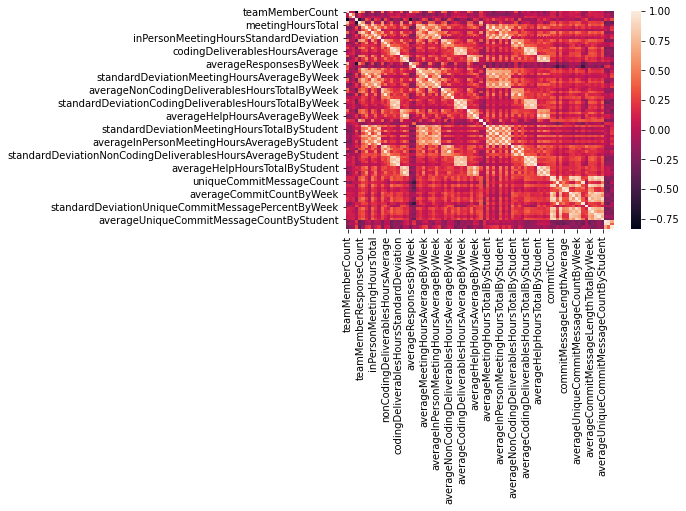

In [5]:
corr = data.corr()
figure = sns.heatmap(corr)

In [6]:
fig = figure.get_figure()
fig.savefig("before_process_t2.png", dpi=600, transparent=False, figsize=(20,12))

In [7]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]

In [8]:
selected_columns = selected_columns[1:].values
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = ap.OLS(Y,x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

In [9]:
SL = 0.05
data_modeled, selected_columns = backwardElimination(data.iloc[:,1:].values, data.iloc[:,0].values, SL, selected_columns)

In [10]:
result = pd.DataFrame()
result['diagnosis'] = df.iloc[:, 84].values

In [11]:
data = pd.DataFrame(data = data_modeled, columns = selected_columns)

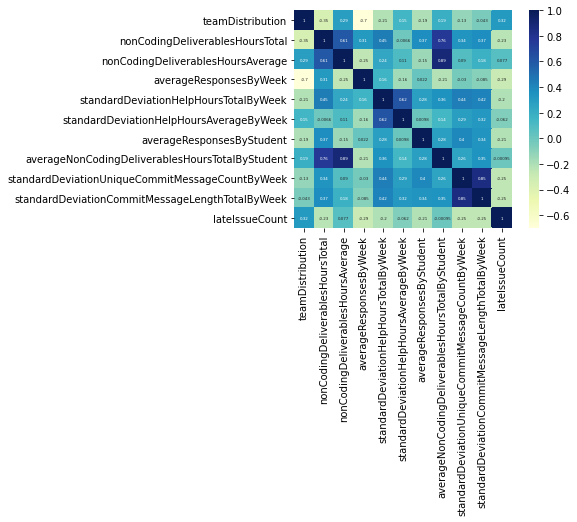

In [12]:
corr_1 = data.corr()
sns_plot = sns.heatmap(corr_1, annot=True, annot_kws={'size': 4}, square=True, 
                       cmap='YlGnBu', xticklabels=True, yticklabels=True)

In [13]:
fig = sns_plot.get_figure()
fig.savefig("T2_Process_Corelation.png", dpi=600, transparent=False, figsize=(20,12))

In [19]:
x_train, x_test, y_train, y_test = train_test_split(data.values, result.values, test_size = 0.25)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
svc=SVC() 
svc.fit(x_train, y_train)

SVC()

In [20]:
prediction = svc.predict(x_test)

In [21]:
cm = confusion_matrix(y_test, prediction)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/x_test.shape[0]
print(accuracy)

0.8947368421052632


In [22]:
print("Accuracy:",accuracy_score(y_test, prediction))
print("F1 Score: ",f1_score(y_test, prediction, average='macro'))
print("Recall score: ", recall_score(y_test,prediction, average='macro'))

Accuracy: 0.8947368421052632
F1 Score:  0.8416666666666666
Recall score:  0.8
